## Multiple Linear Regression

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Read csv
file_path = '../data/final/wo_na.csv'
df = pd.read_csv(file_path)

In [3]:
# Define x and y variables
X = df[['Iron Ore (CFR, $/t)', 'HCC (Aus FOB, $/t)',
         'Domestic Scrap (DDP Jiangsu incl. VAT $/t)',
         'Monthly Export of Semis & Finished Steel as % of Production',
         'FAI in urban real estate development (y-o-y) Growth',
         'Automobile Production (y-o-y)', 'Civil Metal-Vessels/Steel Ships (y-o-y)',
         'Household Fridges (y-o-y)', 'Air Conditioner (y-o-y)']]
y = df['HRC (FOB, $/t)']

In [4]:
# Scale x variables since they are of different magnitudes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-1.21162485e+00 -9.06443942e-01 -1.35172198e+00 ... -1.29702093e-01
   1.85324573e+00 -3.72634321e-01]
 [-1.13077569e+00 -1.24208298e+00 -1.27679578e+00 ...  8.01746133e-02
   1.67753934e+00 -2.07643759e-01]
 [-1.13077569e+00 -1.25291005e+00 -1.25806423e+00 ... -4.03101625e-02
   1.46522744e+00 -1.78181158e-01]
 ...
 [-1.33636003e-01  6.79919871e-02 -4.71339093e-01 ... -3.20145771e-01
  -1.16130105e-01 -1.42826038e-01]
 [-2.68384609e-01 -1.37722265e-01 -5.55631072e-01 ... -3.20145771e-01
  -1.01487906e-01 -1.31040997e-01]
 [ 1.11260317e-03  4.63378553e-02 -3.96412890e-01 ... -3.12372560e-01
  -2.82769083e-02 -1.19255957e-01]]


In [5]:
# Split into training and testing sets with a ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Linear Regression
$$ y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n + \epsilon $$

In [6]:
# Model fitting
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Obtain regression model coefficients
print('Intercept: ', model.intercept_)
list(zip(X, model.coef_))

Intercept:  561.1645668841684


[('Iron Ore (CFR, $/t)', np.float64(-9.38441587400024)),
 ('HCC (Aus FOB, $/t)', np.float64(47.81775343882909)),
 ('Domestic Scrap (DDP Jiangsu incl. VAT $/t)', np.float64(95.4097590357831)),
 ('Monthly Export of Semis & Finished Steel as % of Production',
  np.float64(24.656108421724625)),
 ('FAI in urban real estate development (y-o-y) Growth',
  np.float64(23.91322525734493)),
 ('Automobile Production (y-o-y)', np.float64(5.9342919721776894)),
 ('Civil Metal-Vessels/Steel Ships (y-o-y)', np.float64(4.206376648524)),
 ('Household Fridges (y-o-y)', np.float64(4.83763445957414)),
 ('Air Conditioner (y-o-y)', np.float64(-14.10140257761357))]

In [8]:
# Model predictions
y_pred = model.predict(X_test)

In [9]:
# Error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)
print('R-squared: ', r2)

Mean Absolute Error:  48.08871927571833
Mean Squared Error:  6110.991903377344
Root Mean Squared Error:  78.17283353811185
R-squared:  0.7393035691370791


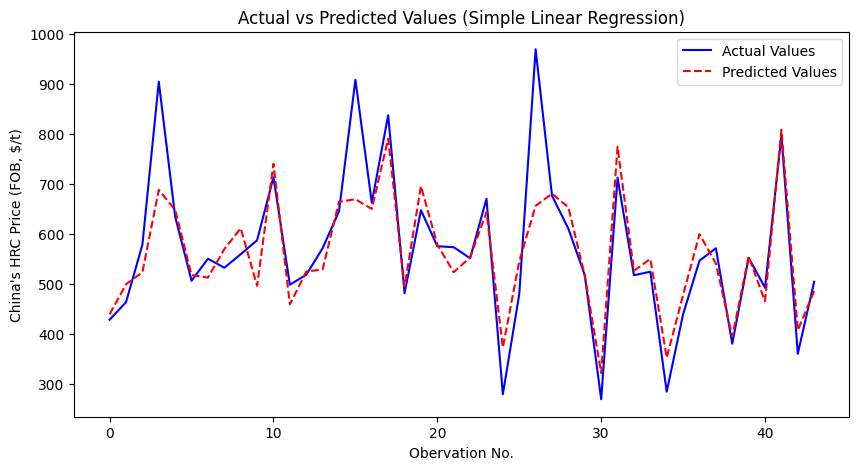

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(y_test)), y_test, label="Actual Values", color="blue")
plt.plot(np.arange(len(y_pred)), y_pred, label="Predicted Values", color="red", linestyle="dashed")

plt.xlabel("Obervation No.")
plt.ylabel("China's HRC Price (FOB, $/t)")
plt.title("Actual vs Predicted Values (Simple Linear Regression)")
plt.legend()
plt.show()

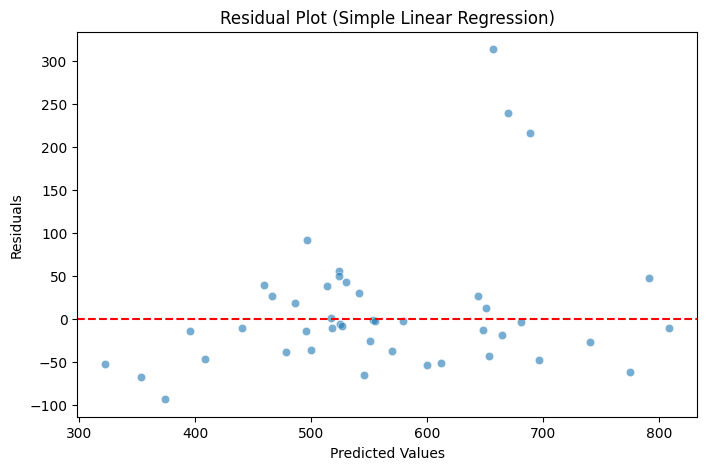

In [11]:
residuals = y_test - y_pred  # Compute residuals

# Plot residuals vs. predicted values
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)  # Scatter plot
plt.axhline(y=0, color="red", linestyle="--")  # Horizontal line at zero
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Simple Linear Regression)")
plt.show()

## Polynomial Linear Regression (degree = 2)
$$ y = \beta_0 + \sum_{i=1}^{n} \beta_i X_i + \sum_{i=1}^{n} \beta_{ii} X_i^2 + \sum_{i=1}^{n} \sum_{j=i+1}^{n} \beta_{ij} X_i X_j + \epsilon $$

where:  
- $X_i$ are the original factors affecting China's HRC price.  
- $X_i^2$ are the squared terms capturing nonlinear relationships.  
- $X_i$, $X_j$ are interaction terms, representing how two factors together impact China's HRC price.  

**Reasons for introducing polynomial features** 
* The relationship between the factors and HRC price is nonlinear as shown in the simple regression.  
* The residual plot above shows curved patterns in linear regression . 
* The interactions between the factors may be significant.  
* High-degree polynomial regression can overfit the data.

In [12]:
# Define polynomial transformation
degree = 2
poly = PolynomialFeatures(degree)

# Transform BOTH training and testing data
X_train_poly = poly.fit_transform(X_train)  # Fit and transform for training
X_test_poly = poly.transform(X_test)        # Only transform for testing

# Train the model using transformed training data
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict using the transformed test data
y_pred_poly = model.predict(X_test_poly)

In [13]:
# Get feature names and coefficients
feature_names = poly.get_feature_names_out(input_features=X.columns)
coefficients = model.coef_

# Display results
pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})

,Feature,Coefficient
0,1,1.089961e-14
1,"Iron Ore (CFR, $/t)",5.064440e+01
2,"HCC (Aus FOB, $/t)",3.135388e+01
3,Domestic Scrap (DDP Jiangsu incl. VAT $/t),6.275749e+01
4,Monthly Export of Semis & Finished Steel as % ...,4.389088e+00
5,FAI in urban real estate development (y-o-y) G...,-9.380353e+00
6,Automobile Production (y-o-y),1.988224e+01
7,Civil Metal-Vessels/Steel Ships (y-o-y),8.644870e+00
8,Household Fridges (y-o-y),1.865849e+01
9,Air Conditioner (y-o-y),4.693470e+00


In [14]:
# Error metrics
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print('Mean Absolute Error: ', mae_poly)
print('Mean Squared Error: ', mse_poly)
print('Root Mean Squared Error: ', rmse_poly)
print('R-squared: ', r2_poly)

Mean Absolute Error:  33.803464853771295
Mean Squared Error:  2121.1266734683845
Root Mean Squared Error:  46.05569099979268
R-squared:  0.9095122098139682


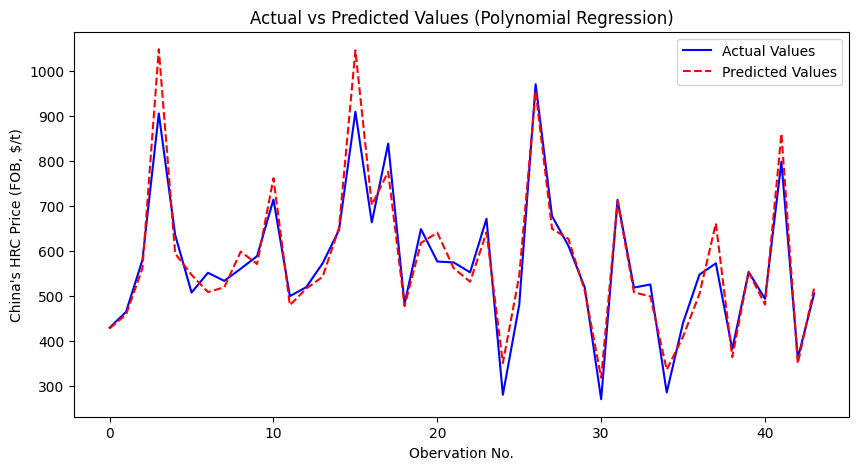

In [15]:
# Assuming y_test and y_pred are 1D arrays
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(y_test)), y_test, label="Actual Values", color="blue")
plt.plot(np.arange(len(y_pred_poly)), y_pred_poly, label="Predicted Values", color="red", linestyle="dashed")

plt.xlabel("Obervation No.")
plt.ylabel("China's HRC Price (FOB, $/t)")
plt.title("Actual vs Predicted Values (Polynomial Regression)")
plt.legend()
plt.show()

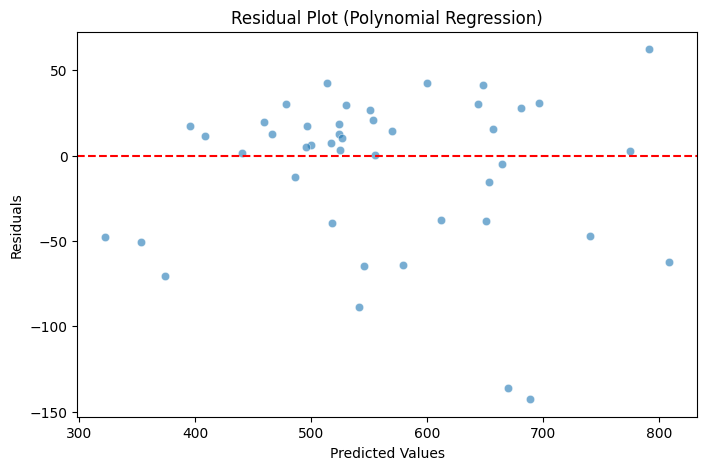

In [16]:
residuals_poly = y_test - y_pred_poly  # Compute residuals

# Plot residuals vs. predicted values
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals_poly, alpha=0.6)  # Scatter plot
plt.axhline(y=0, color="red", linestyle="--")  # Horizontal line at zero
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Polynomial Regression)")
plt.show()